In [1]:
import pandas as pd
import numpy as np

#for plotting
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA #Dimensionality reduction
from sklearn import preprocessing # for standardizing numerical variables

In [3]:
#importing Train & Test data
Train_data = pd.read_csv("TrainingSet.csv") 
Test_data = pd.read_csv("TestingSet.csv")

In [4]:
#Checking dimensions of Train & Test
print("Train dim " , Train_data.shape)
print("Test dim " , Test_data.shape)

Train dim  (3722, 220)
Test dim  (400, 220)


In [5]:
print("Train datatypes " , Train_data.dtypes)
print("Test datatypes " , Test_data.dtypes)

Train datatypes  V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
V29              float64
V30              float64
                  ...   
V191             float64
V192             float64
V193             float64
V194             float64
V195             float64
V196             float64
V197             float64
V198             float64
V199    

In [6]:
#Converting Target Variable datatype to factor
Train_data.Machine_State = Train_data.Machine_State.astype('category')

In [7]:
#Checking whether Response variable data distribution is balanced or not
print(pd.value_counts(Train_data['Machine_State']))

Good    3240
Bad      463
Name: Machine_State, dtype: int64


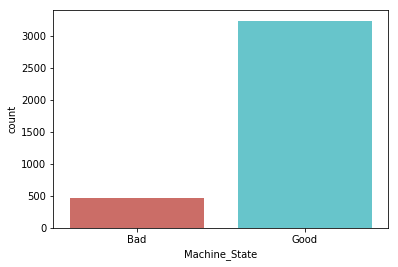

In [8]:
#Plotting Trget variable data distribution for visualization
sns.countplot(x='Machine_State', data =Train_data,palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [9]:
# Sum of Null values per column on training data set
null_columns=Train_data.columns[Train_data.isnull().any()]
Train_data[null_columns].isnull().sum()

V1               56
V8               56
V15              56
V22              56
V29              56
V36              56
V43              56
V50              56
V57              56
V64              56
V71              56
V78              56
V85              56
V92              56
V99              56
V106             56
V113             56
V120             56
V127             56
V134             56
V141             56
V148             56
V155             56
V162             56
V169             56
V176             56
V183             56
V190             56
V197             56
V205             56
V213             56
Machine_State    19
dtype: int64

In [10]:
## Sum of Null values per column on test data set
null_columns=Test_data.columns[Test_data.isnull().any()]
Test_data[null_columns].isnull().sum()

V1      5
V8      5
V15     5
V22     5
V29     5
V36     5
V43     5
V50     5
V57     5
V64     5
V71     5
V78     5
V85     5
V92     5
V99     5
V106    5
V113    5
V120    5
V127    5
V134    5
V141    5
V148    5
V155    5
V162    5
V169    5
V176    5
V183    5
V190    5
V197    5
V205    5
V213    5
dtype: int64

In [11]:
#imputing Na with it's column mean
Train_imputedSet=  Train_data.fillna(Train_data.mean())
Test_imputedSet=  Test_data.fillna(Test_data.mean())

In [12]:
## Verifying if any null value exists for Train data
null_columns=Train_imputedSet.columns[Train_imputedSet.isnull().any()]
Train_imputedSet[null_columns].isnull().sum()

Machine_State    19
dtype: int64

In [13]:
## Verifying if any null value exists for Test data
null_columns=Test_imputedSet.columns[Test_imputedSet.isnull().any()]
Test_imputedSet[null_columns].isnull().sum()

Series([], dtype: float64)

In [14]:
#Checking Test data dimension and column names
print(Test_imputedSet.shape)
print(Test_imputedSet.columns)

(400, 220)
Index(['Sl No.', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218',
       'V219'],
      dtype='object', length=220)


In [15]:
#Remove the irrelevant column from Testdataset
X_test = Test_imputedSet.loc[:,Test_imputedSet.columns != 'Sl No.']
print(X_test.shape)


(400, 219)


In [16]:
# To cocat with Submission file
SerialNum = Test_imputedSet["Sl No."]
SerialNum.head()

0    1
1    2
2    3
3    4
4    5
Name: Sl No., dtype: int64

In [17]:
#Replace null values with 'Bad' as it is important and less too
#Train_imputedSet['Machine_State'].fillna('Bad', inplace=True)

#Drop NA target variable
Train_imputedSet.dropna(inplace = True)

In [18]:
#Write the data to csv
Train_imputedSet.to_csv("Imputed_DataSet.csv", index=False)

In [19]:
print(Train_imputedSet.shape)

(3703, 220)


In [20]:
# Separating target variable from dataset
X = Train_imputedSet.loc[:,Train_imputedSet.columns != 'Machine_State']
Y = Train_imputedSet.loc[:,Train_imputedSet.columns == 'Machine_State']
print(X.columns)  
print(X.shape)  
print(Y.shape)  

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218',
       'V219'],
      dtype='object', length=219)
(3703, 219)
(3703, 1)


In [21]:
#Undersampling the data to balance
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_sample(X,Y)
print(X_resampled.shape)

C:\Users\farha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(926, 219)


In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)  

In [23]:
#Checking dimensions
print(X_test.shape)
print(X_train.shape)
print(X_validation.shape)

(400, 219)
(740, 219)
(186, 219)


In [25]:
#standardizing numerical variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_validation = sc.transform(X_validation) 
X_test = sc.transform(X_test) 

In [26]:
#Performing dimensionality reduction as the dataset has high dimensions
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_validation = pca.transform(X_validation)
X_test = pca.transform(X_test) 

In [27]:
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))


0      2.517011e-01
1      1.089057e-01
2      7.821135e-02
3      6.404113e-02
4      5.301884e-02
5      4.954015e-02
6      4.307891e-02
7      3.302442e-02
8      3.028885e-02
9      2.500635e-02
10     2.306048e-02
11     2.075090e-02
12     1.968058e-02
13     1.479066e-02
14     1.287455e-02
15     1.222909e-02
16     1.197437e-02
17     1.052674e-02
18     9.993804e-03
19     9.653641e-03
20     8.723885e-03
21     8.190145e-03
22     7.867369e-03
23     7.583638e-03
24     7.046688e-03
25     6.631260e-03
26     5.630096e-03
27     5.594683e-03
28     4.493190e-03
29     4.242948e-03
           ...     
189    1.323451e-33
190    1.323451e-33
191    1.323451e-33
192    1.323451e-33
193    1.323451e-33
194    1.323451e-33
195    1.323451e-33
196    1.323451e-33
197    1.323451e-33
198    1.323451e-33
199    1.323451e-33
200    1.323451e-33
201    1.323451e-33
202    1.323451e-33
203    1.323451e-33
204    1.323451e-33
205    1.323451e-33
206    1.323451e-33
207    1.323451e-33


In [31]:
print(sum(var_explained[0:31]))
##indeed,the first 60 PCs explain 99% of the variance

0.9521790060590138


In [32]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)


[25.17 36.06 43.88 50.28 55.58 60.53 64.84 68.14 71.17 73.67 75.98 78.06
 80.03 81.51 82.8  84.02 85.22 86.27 87.27 88.24 89.11 89.93 90.72 91.48
 92.18 92.84 93.4  93.96 94.41 94.83 95.21 95.54 95.84 96.12 96.38 96.63
 96.85 97.06 97.27 97.47 97.65 97.82 97.97 98.11 98.24 98.36 98.47 98.58
 98.68 98.78 98.87 98.95 99.03 99.1  99.16 99.22 99.27 99.32 99.37 99.42
 99.46 99.5  99.54 99.57 99.6  99.63 99.65 99.67 99.69 99.71 99.73 99.75
 99.77 99.79 99.8  99.81 99.82 99.83 99.84 99.85 99.86 99.87 99.88 99.89
 99.9  99.91 99.92 99.93 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94
 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94
 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94
 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94
 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94
 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94
 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99.94 99

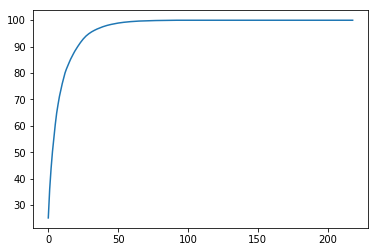

In [33]:
#Plotting to visualize
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(var1)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=31)   #only include first 60 components as it explains maximum variance
X_train = pca.fit_transform(X_train)  
X_validation = pca.transform(X_validation)  
X_test = pca.transform(X_test) 

In [36]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(740, 31)
(186, 31)
(400, 31)


In [45]:
#Training model using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
#Prediction on Validation data
y_pred = logreg.predict(X_validation)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_validation, y_validation)))
#print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, y_pred)))

Accuracy of logistic regression classifier on test set: 0.70


In [47]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validation, y_pred)
print(confusion_matrix)
#The result is telling us that we have 77+79 correct predictions and 23+14 incorrect predictions.

[[67 21]
 [34 64]]


In [48]:
#Classficattion report on Validaton dataset

from sklearn.metrics import classification_report
print(classification_report(y_validation, y_pred))

             precision    recall  f1-score   support

        Bad       0.66      0.76      0.71        88
       Good       0.75      0.65      0.70        98

avg / total       0.71      0.70      0.70       186



In [49]:
#test predictions

test_logistic_pred = logreg.predict(X_test)
pred_test_logistic = pd.DataFrame(test_logistic_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_logistic['Machine_State']))

#submission = pd.concat([SerialNum, pred_test_logistic], axis=1)

Good    236
Bad     164
Name: Machine_State, dtype: int64


In [50]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
model = GaussianNB()
naive = model.fit(X_train, y_train)
naive_preds = naive.predict(X_validation)
print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, naive_preds)))

NameError: name 'accuracy_score' is not defined

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix_n= confusion_matrix(y_validation, naive_preds)
print(confusion_matrix_n)
#print("confusion Matrix for Naive Bayes Model : " ,confusion_matrix_naive)

[[74 14]
 [49 49]]


In [52]:
print("classification_report for Naive Bayes Model : ")
print(classification_report(y_validation, naive_preds))

classification_report for Naive Bayes Model : 
             precision    recall  f1-score   support

        Bad       0.60      0.84      0.70        88
       Good       0.78      0.50      0.61        98

avg / total       0.69      0.66      0.65       186



In [53]:
#test predictions

test_naive_pred = naive.predict(X_test)
pred_test_naive = pd.DataFrame(test_naive_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_naive['Machine_State']))

Bad     227
Good    173
Name: Machine_State, dtype: int64


In [54]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2)
rf_model = rf.fit(X_train, y_train)
rf_pred = rf_model.predict(X_validation)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_validation, rf_pred)))
print(classification_report(y_validation, rf_pred))

Accuracy is 0.76
             precision    recall  f1-score   support

        Bad       0.76      0.74      0.75        88
       Good       0.77      0.79      0.78        98

avg / total       0.76      0.76      0.76       186



In [57]:
#test predictions

test_rf_pred = rf.predict(X_test)
pred_test_rf = pd.DataFrame(test_rf_pred, columns=['Machine_State'])
print(pd.value_counts(pred_test_rf['Machine_State']))

Good    279
Bad     121
Name: Machine_State, dtype: int64
